# Calc Simple moving average
#### Source: https://www.datacamp.com/community/tutorials/moving-averages-in-pandas

In [127]:
# requirement
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline

In [131]:
# get stock information of Tesla(TSLA), period = 12 months
tsla = yf.Ticker("TSLA")
hist = tsla.history(period="12mo")

# new df=sma, with 4 columns: open, high, low and close stock value
sma = hist.iloc[:,0:4]


In [136]:
# 1, 3, 10 days simple moving average (SMA), using close value
sma['sma_1'] = sma.iloc[:, 3].rolling(window=1).mean()
sma['sma_3'] = sma.iloc[:, 3].rolling(window=3).mean()
sma['sma_10'] = sma.iloc[:, 3].rolling(window=10).mean()

# checker
print('There are :', sma.shape[0], 'datapoints')


There are : 253 datapoints


In [139]:
# Compare sma 3 days vs sma 10 days, by 3 - 10
sma['sma3_10'] = sma['sma_3'] - sma['sma_10']


calc = []
for row in sma['sma3_10']:
    if row > 0: # if 3 > 10, upward trend
        calc.append('up')
    elif row < 0: # if 3 < 10, downward trend
        calc.append('down')
    elif row is 0: # 3 = 10, no change trend
        calc.append('stay')
    else: 
        calc.append('NaN')
sma['sma3_10'] = calc

sma.head(50)

,Open,High,Low,Close,sma_1,sma_3,sma_10,sma3_10
Date,,,,,,,,
2019-06-06,204.44,211.00,201.80,205.95,205.95,NaN,NaN,NaN
2019-06-07,205.00,210.84,203.50,204.50,204.50,NaN,NaN,NaN
2019-06-10,210.25,216.94,209.01,212.88,212.88,207.776667,NaN,NaN
2019-06-11,219.14,220.90,213.50,217.10,217.10,211.493333,NaN,NaN
2019-06-12,222.95,223.38,209.00,209.26,209.26,213.080000,NaN,NaN
2019-06-13,210.38,214.90,207.51,213.91,213.91,213.423333,NaN,NaN
2019-06-14,211.25,216.65,210.40,214.92,214.92,212.696667,NaN,NaN
2019-06-17,215.48,227.00,214.27,225.03,225.03,217.953333,NaN,NaN
2019-06-18,228.72,234.74,222.56,224.74,224.74,221.563333,NaN,NaN


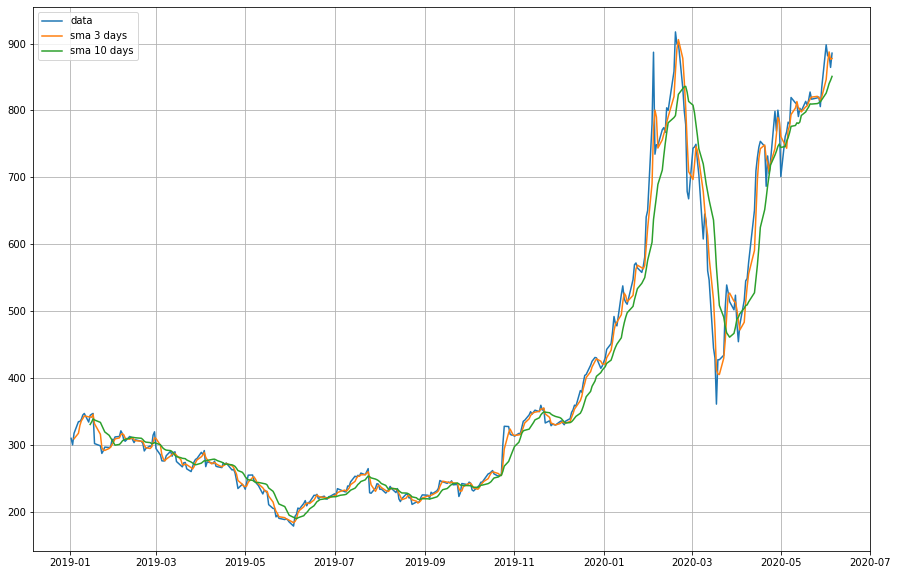

In [109]:
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(sma_2019['Close'],label='data')
plt.plot(sma_2019['sma_3'],label='sma 3 days')
plt.plot(sma_2019['sma_10'],label='sma 10 days')
plt.legend(loc=2)